In [1]:
import os
import keras
%matplotlib inline
import matplotlib.pyplot as plt

from getConfig import getConfig
from loadWeights import loadWeights
from buildNN     import buildNN

Using TensorFlow backend.


In [2]:
def getModelFiles(config):
    # Get all the models that have been saved
    genFiles = []
    
    rootFolder = config["modelDir"]
    for root, dirs, files in os.walk(rootFolder):
        for file in files:
            if file.startswith("gen_"):
                filename = os.path.join(root, file)
                genFiles.append(filename)
    return sorted(genFiles)

In [3]:
config = getConfig()
modelFiles = getModelFiles(config)

In [4]:
def formatName(fileName):
    start = fileName.find("gen")
    stop = fileName.find(".")
    return int(fileName[start+4:stop])

In [5]:
models = []
for m in modelFiles:
    print(m)
    nn = buildNN(config, "generator")
    nn.load_weights(m)
    nn.name = formatName(m)
    models.append(nn)

W0729 21:22:17.727303 139961354995456 deprecation_wrapper.py:119] From /home/tbrownex/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 21:22:17.752874 139961354995456 deprecation_wrapper.py:119] From /home/tbrownex/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 21:22:17.760411 139961354995456 deprecation_wrapper.py:119] From /home/tbrownex/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 21:22:17.855750 139961354995456 deprecation_wrapper.py:119] From /home/tbrownex/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.c

/home/tbrownex/TF/models/gen_10.h5


W0729 21:22:18.258673 139961354995456 deprecation_wrapper.py:119] From /home/tbrownex/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0729 21:22:18.259881 139961354995456 deprecation_wrapper.py:119] From /home/tbrownex/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



/home/tbrownex/TF/models/gen_100.h5
/home/tbrownex/TF/models/gen_110.h5
/home/tbrownex/TF/models/gen_120.h5
/home/tbrownex/TF/models/gen_130.h5
/home/tbrownex/TF/models/gen_140.h5
/home/tbrownex/TF/models/gen_150.h5
/home/tbrownex/TF/models/gen_160.h5
/home/tbrownex/TF/models/gen_170.h5
/home/tbrownex/TF/models/gen_180.h5
/home/tbrownex/TF/models/gen_190.h5
/home/tbrownex/TF/models/gen_20.h5
/home/tbrownex/TF/models/gen_200.h5
/home/tbrownex/TF/models/gen_210.h5
/home/tbrownex/TF/models/gen_220.h5
/home/tbrownex/TF/models/gen_230.h5
/home/tbrownex/TF/models/gen_240.h5
/home/tbrownex/TF/models/gen_250.h5
/home/tbrownex/TF/models/gen_260.h5
/home/tbrownex/TF/models/gen_270.h5
/home/tbrownex/TF/models/gen_280.h5
/home/tbrownex/TF/models/gen_290.h5
/home/tbrownex/TF/models/gen_30.h5
/home/tbrownex/TF/models/gen_40.h5
/home/tbrownex/TF/models/gen_50.h5
/home/tbrownex/TF/models/gen_60.h5
/home/tbrownex/TF/models/gen_70.h5
/home/tbrownex/TF/models/gen_80.h5
/home/tbrownex/TF/models/gen_90.h5


ValueError: invalid literal for int() with base 10: 'Final'

In [6]:
before = np.random.normal(size=(config["batchSize"], config["codeSize"])).astype('float32')

d = {}
for m in models:
    d[m.name] = m.predict(before)

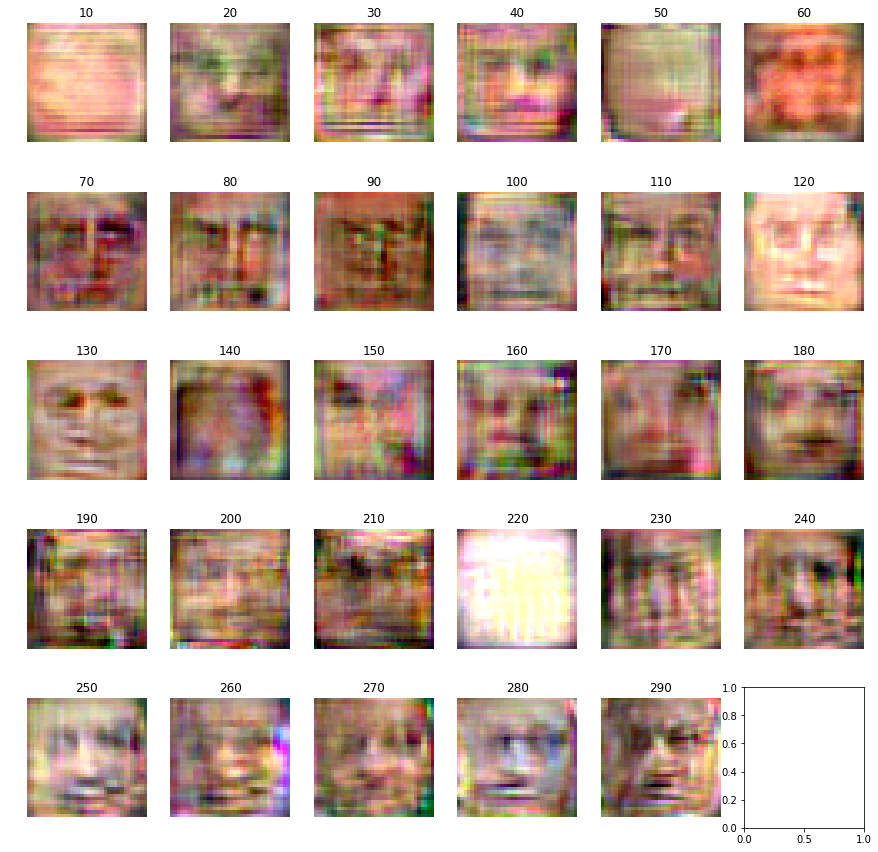

In [7]:
count = len(d.keys())
numCols = 6

rem = count % numCols
if rem > 0:
    numRows = int(count/numCols)+1
else:
    numRows = int(count/numCols)

positions = [(r,c) for r in range(numRows) for c in range(numCols)]

titles = sorted(d.keys())

f, axarr = plt.subplots(numRows, numCols,figsize=(15,15))
for x, key in enumerate(titles):
    batch = d[key]
    image = batch[11]       # This is just a random image from the batch
    image = np.clip(image, 0,1)
    axarr[positions[x]].set_title(titles[x])
    axarr[positions[x]].axis("off")
    axarr[positions[x]].imshow(image)